In [1]:
%load_ext autoreload


In [2]:
%autoreload 2

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
''' Sn properties - Masses, Ratios, Cup Configurations, ... '''
from sn_config import *
'''Classes for Reading in the Data and applying Internal Normalisation'''
from nu_data_reduction import NU_data_read, int_norm, evaluation
from pylab import plot, show, savefig
from scipy import stats
import seaborn as sns
#%pylab inline

In [6]:
path = "/Volumes/friebelm/PhD/NU Plasma/Measurements/2015-11-03/"
path_sav = "/Volumes/friebelm/PhD/NU Plasma/Measurements/compilation/"
files_start = 2462
files_end = 2771

In [26]:
# cup configuration
cup_config = cycle_Sb_2
# Isotopes used for Interference correction
corr_isotopes_1 = {"Cd" : "111", "Te" : "125"}
corr_isotopes_2 = {"Cd" : "111","Te" : "125", "Xe" : "129"}
#corr_isotopes_Sb = {"Te": "125", "Xe" : "129"}
corr_isotopes_Sb = {}
#
# Mass Range of cup configuration
mass_range = cycle_Sb_2_mass_range
#isotopes = [["111", "112", "114", "115", "116", "117", "118", "119", "122", "124", "125", "126", "129"], ["117", "118", "119", "122", "124"]]
#isotopes = [["112", "114", "115", "116", "117", "118", "119", "122", "124"]]
isotopes = [["116", "117", "118", "119", "122", "124"]]
isotopes_column = ["116", "117", "118", "119", "122", "124"]
data_sample_column = [(i + "/" + "120") for i in isotopes_column]

denom_isotope = "120"
#number of iterations for beta
iter_beta = 10

# Interference_corr on the denominator isotope
isotope_denom_corr = False

blk_corr = False

In [8]:
columns = ["cycle", "sample", "date", "H8 (1)", "H7 (1)", "H6 (1)", "H5 (1)", "H4 (1)", "H3 (1)", "H2 (1)", "H1 (1)", "Ax (1)", "L1 (1)", "L2 (1)", "L3 (1)"]
blk_ls = []
sample_ls = []
df_all = pd.DataFrame()
files_1 = range(files_start, files_end, 1)
for sample in files_1:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    df_zero = df.data_zero_corr(sample)
    df_zero = pd.DataFrame(df_zero["cycle1"])
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    df_zero["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    df_zero["sample"] = sample_name
    df_zero["cycle"] = df_zero.index.values
    df_zero.index = df_zero["date"]
    df_zero = df_zero[columns]
    df_all = df_all.append(df_zero, ignore_index = True)

    if sample_name == "blank sol" or sample_name == "wash" or sample_name == "wash clean":
        blk_ls.append(sample)
    elif sample_name == "SQ" or sample_name == "teflon blank":
        None
    else:
        sample_ls.append(sample)

df_all.set_index("date", inplace = True)
df_all

,cycle,sample,H8 (1),H7 (1),H6 (1),H5 (1),H4 (1),H3 (1),H2 (1),H1 (1),Ax (1),L1 (1),L2 (1),L3 (1)
date,,,,,,,,,,,,,,
2015-11-03 12:48:00,1,NIST 100ppb,0.011682,0.014214,7.114700e-06,1.793463,4.024197,1.399074,5.243170,9.597127,2.495560,6.945542,2.170561,4.059021
2015-11-03 12:48:00,2,NIST 100ppb,0.011734,0.014214,-1.370950e-05,1.799842,4.037356,1.404121,5.260623,9.631644,2.504509,6.970605,2.178390,4.073969
2015-11-03 12:48:00,3,NIST 100ppb,0.011717,0.014221,1.241030e-05,1.801965,4.041636,1.405787,5.265731,9.642564,2.507344,6.978272,2.180679,4.078194
2015-11-03 12:48:00,4,NIST 100ppb,0.011740,0.014239,1.133810e-05,1.816900,4.074161,1.417416,5.308268,9.722492,2.528167,7.036634,2.199176,4.112337
2015-11-03 12:48:00,5,NIST 100ppb,0.011721,0.014201,9.579600e-06,1.801071,4.039004,1.405076,5.262304,9.638287,2.506268,6.975511,2.180018,4.076843
2015-11-03 12:48:00,6,NIST 100ppb,0.011772,0.014229,1.583420e-05,1.807859,4.053326,1.410391,5.280850,9.674309,2.515846,7.001600,2.188175,4.091981
2015-11-03 12:48:00,7,NIST 100ppb,0.011754,0.014204,-4.980700e-06,1.791631,4.016720,1.397651,5.233722,9.587493,2.493149,6.938866,2.168605,4.055442
2015-11-03 12:48:00,8,NIST 100ppb,0.011766,0.014187,-5.944100e-06,1.784330,4.000362,1.392072,5.212629,9.549472,2.483366,6.911683,2.159982,4.039723
2015-11-03 12:48:00,9,NIST 100ppb,0.011740,0.014125,1.765700e-06,1.772595,3.973526,1.382917,5.177208,9.486622,2.466946,6.866023,2.145933,4.012860


In [27]:
files_1 = range(files_start, files_end, 1)
df_raw_signals = pd.DataFrame()
df_external_norm = pd.DataFrame()
df_external_norm_mean = pd.DataFrame()
df_external_outlier = pd.DataFrame()

for sample in sample_ls:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    
    if (blk_corr == True) and (blk_corr_sample == True):
        blk_1 = NU_data_read(path, blk1, cup_config)
        blk_2 = NU_data_read(path, blk2, cup_config)
        df_zero = df.data_zero_corr(sample)
        df_bgd_1 = blk_1.data_zero_corr(blk1)
        df_bgd_2 = blk_2.data_zero_corr(blk2)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_Sb , denom_corr_ratio)
        new_corr.data_bgd_corr(df_bgd_1, df_bgd_2)
    else:
        df_zero = df.data_zero_corr(sample)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_Sb , denom_corr_ratio)
    
    data_sample_raw = new_corr.raw_signals("120")
    data_sample_raw = pd.DataFrame.from_dict(data_sample_raw, orient = 'index')
    data_sample_raw = new_corr.mad_outlier_rejection(data_sample_raw)
    
    data_sample = new_corr.internal_norm_1("120", 10)
# new method for df with all data together with signals in pycharm
    data_sample = pd.DataFrame.from_dict(data_sample, orient = 'index')
    data_sample = new_corr.mad_outlier_rejection(data_sample)
        
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    data_sample = data_sample.drop(denom_isotope, axis=1)
    data_sample = data_sample[sorted(data_sample.columns)]
    data_sample.columns = data_sample_column
    data_sample["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    data_sample["sample"] = sample_name
    data_sample["cycle"] = data_sample.index.values
    #data_sample_outlier = data_sample_outlier[["116", "117", "119", "120", "122", "124"]]
    #data_sample_outlier.columns = ["116/118", "117/118", "119/118", "120/118", "122/118", "124/118"]
    #data_sample_outlier["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    #data_sample_outlier["sample"] = sample_name
    #data_sample_outlier["cycle"] = data_sample.index.values
    
    
    data_sample_raw["cycle"] = data_sample_raw.index.values
    data_sample = data_sample.merge(data_sample_raw)
    
    df_external_norm = df_external_norm.append(data_sample)
    #df_external_outlier = df_external_outlier.append(data_sample_outlier) 

In [168]:
files_1 = range(files_start, files_end, 1)
df_raw_signals = pd.DataFrame()
df_external_norm = pd.DataFrame()
df_external_norm_mean = pd.DataFrame()
df_external_outlier = pd.DataFrame()

for sample in sample_ls:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    # method for blank correction
    # arbitrary blank positions
    #blk1 = [item for item in blk_ls if item < sample]
    #blk2 = [item for item in blk_ls if item > sample]
    #blk1 = blk1[-1]
    #blk2 = blk2[0]
    #blk_corr_sample == True
    
    # blank measurement surrounds sample
    #if ((sample-1) in blk_ls) and ((sample+1) in blk_ls):
    #    blk1 = sample-1
    #    blk2 = sample+1
    #    blk_corr_sample = True
    #else:
    #    blk_corr_sample = False  
    if (blk_corr == True) and (blk_corr_sample == True):
        blk_1 = NU_data_read(path, blk1, cup_config)
        blk_2 = NU_data_read(path, blk2, cup_config)
        df_zero = df.data_zero_corr(sample)
        df_bgd_1 = blk_1.data_zero_corr(blk1)
        df_bgd_2 = blk_2.data_zero_corr(blk2)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_Sb , denom_corr_ratio)
        new_corr.data_bgd_corr(df_bgd_1, df_bgd_2)
    else:
        df_zero = df.data_zero_corr(sample)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_Sb , denom_corr_ratio)
    
    data_sample_raw = new_corr.raw_signals("118")
    data_sample_raw = pd.DataFrame.from_dict(data_sample_raw, orient = 'index')
    data_sample_raw = data_sample_raw[np.abs(data_sample_raw-data_sample_raw.mean())<=(2*data_sample_raw.std())]
    
    data_sample = new_corr.internal_norm_1("118", 10)
# new method for df with all data together with signals in pycharm
    data_sample = pd.DataFrame.from_dict(data_sample, orient = 'index')
    data_sample = data_sample[np.abs(data_sample-data_sample.mean())<=(2*data_sample.std())]
    data_sample_outlier= data_sample[np.abs(data_sample-data_sample.mean())>(2*data_sample.std())]
    
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    data_sample = data_sample[["116", "117", "119", "120", "122", "124"]]
    data_sample.columns = ["116/118", "117/118", "119/118", "120/118", "122/118", "124/118"]
    data_sample["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    data_sample["sample"] = sample_name
    data_sample["cycle"] = data_sample.index.values
    data_sample_outlier = data_sample_outlier[["116", "117", "119", "120", "122", "124"]]
    data_sample_outlier.columns = ["116/118", "117/118", "119/118", "120/118", "122/118", "124/118"]
    data_sample_outlier["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    data_sample_outlier["sample"] = sample_name
    data_sample_outlier["cycle"] = data_sample.index.values
    
    
    data_sample_raw["cycle"] = data_sample_raw.index.values
    data_sample = data_sample.merge(data_sample_raw)
    
    df_external_norm = df_external_norm.append(data_sample)
    df_external_outlier = df_external_outlier.append(data_sample_outlier) 

KeyboardInterrupt: 

In [22]:
df_external_norm.set_index("date", inplace = True)
columns = ["cycle", "sample"]
columns.extend(data_sample_column)
columns.extend(sorted(data_sample_raw.drop("cycle", axis=1).columns))
df_external_sub = pd.DataFrame(df_external_norm, columns = columns)

df_all_sub = df_all[(df_all["sample"] != "blank sol") & (df_all["sample"] != "teflon blank")]
df_external_sub["125"] = df_all_sub["H6 (1)"]
df_external_sub["Te/Sn"] = (df_all_sub["H6 (1)"]/7.0509)/(df_all_sub["L1 (1)"]/24.223)

#df_external_sub = df_external_sub[df_external_sub["118"] > 4]
df_external_sub

,cycle,sample,116/118,117/118,119/118,120/118,122/118,124/118,116,117,118,119,120,122,124,125,Te/Sn
date,,,,,,,,,,,,,,,,,
2015-11-03 12:48:00,1,NIST 100ppb,0.600157,0.316671,0.354609,1.346095,0.19125,0.239032,4.059021,2.170561,6.945542,2.495560,9.597127,1.399074,1.793463,7.114700e-06,3.519118e-06
2015-11-03 12:48:00,2,NIST 100ppb,0.600201,0.316671,0.354602,1.346080,0.19125,0.239020,4.073969,2.178390,6.970605,2.504509,9.631644,1.404121,1.799842,-1.370950e-05,-6.756698e-06
2015-11-03 12:48:00,3,NIST 100ppb,0.600189,0.316662,0.354605,1.346067,0.19125,0.239008,4.078194,2.180679,6.978272,2.507344,9.642564,1.405787,1.801965,1.241030e-05,6.109670e-06
2015-11-03 12:48:00,4,NIST 100ppb,0.600167,0.316692,0.354593,1.346030,0.19125,0.239023,4.112337,2.199176,7.036634,2.528167,9.722492,1.417416,1.816900,1.133810e-05,5.535524e-06
2015-11-03 12:48:00,5,NIST 100ppb,0.600194,0.316682,0.354603,1.346077,0.19125,0.239023,4.076843,2.180018,6.975511,2.506268,9.638287,1.405076,1.801071,9.579600e-06,4.717965e-06
2015-11-03 12:48:00,6,NIST 100ppb,0.600191,0.316686,0.354628,1.346045,0.19125,0.239015,4.091981,2.188175,7.001600,2.515846,9.674309,1.410391,1.807859,1.583420e-05,7.769305e-06
2015-11-03 12:48:00,7,NIST 100ppb,0.600187,0.316686,0.354613,1.346076,0.19125,0.239038,4.055442,2.168605,6.938866,2.493149,9.587493,1.397651,1.791631,-4.980700e-06,-2.465955e-06
2015-11-03 12:48:00,8,NIST 100ppb,0.600189,0.316661,0.354617,1.346061,0.19125,0.239026,4.039723,2.159982,6.911683,2.483366,9.549472,1.392072,1.784330,-5.944100e-06,-2.954511e-06
2015-11-03 12:48:00,9,NIST 100ppb,0.600172,0.316696,0.354612,1.346074,0.19125,0.239023,4.012860,2.145933,6.866023,2.466946,9.486622,1.382917,1.772595,1.765700e-06,8.834766e-07


In [23]:
def SE(x):
    SE = np.std(x) / x.count()
    return SE

df_external_norm_mean = df_external_sub.drop("cycle", axis=1).groupby(df_external_sub.index).mean()
df_external_norm_mean_sd = df_external_sub.drop("cycle", axis=1).groupby(df_external_sub.index).agg([np.mean, SE])
df_external_norm_mean["sample"] = df_external_norm[df_external_norm["cycle"] == 1]["sample"]
df_external_norm_mean_sd["sample"] = df_external_norm[df_external_norm["cycle"] == 1]["sample"]

#df_external_norm_mean = df_external_norm_mean[1:]
#df_external_norm_mean = df_external_norm_mean.drop(datetime.strptime("20150310 23:59", "%Y%m%d %H:%M"))
#df_external_norm_mean_sd = df_external_norm_mean_sd[1:]
df_external_norm_mean

,116/118,117/118,119/118,120/118,122/118,124/118,116,117,118,119,120,122,124,125,Te/Sn,sample
date,,,,,,,,,,,,,,,,
2015-11-03 12:48:00,0.600187,0.316681,0.354611,1.346072,0.19125,0.239021,4.087570,2.185787,6.994006,2.512971,9.663866,1.408820,1.805864,7.983460e-06,3.929203e-06,NIST 100ppb
2015-11-03 13:03:00,0.600208,0.316696,0.354616,1.346073,0.19125,0.239017,4.221458,2.257532,7.223711,2.595703,9.982451,1.455444,1.865817,-5.640560e-06,-2.656348e-06,NIST 100ppb
2015-11-03 13:12:00,0.600231,0.316702,0.354618,1.346063,0.19125,0.239011,4.075411,2.179502,6.974229,2.506190,9.638478,1.405428,1.801817,-5.121320e-06,-2.564022e-06,NIST 100ppb
2015-11-03 13:20:00,0.600238,0.316705,0.354625,1.346054,0.19125,0.239010,4.143118,2.215761,7.090348,2.548031,9.799558,1.428976,1.832088,-2.178319e-05,-1.052471e-05,NIST 100ppb
2015-11-03 13:29:00,0.600228,0.316704,0.354621,1.346063,0.19125,0.239014,4.163913,2.226917,7.126157,2.560891,9.849153,1.436238,1.841453,2.693845e-06,1.309146e-06,NIST 100ppb
2015-11-03 13:38:00,0.600249,0.316709,0.354625,1.346042,0.19125,0.239003,4.049733,2.165888,6.930903,2.490825,9.579628,1.397024,1.791170,-9.592865e-06,-4.789289e-06,NIST 100ppb
2015-11-03 13:53:00,0.600239,0.316706,0.354627,1.346060,0.19125,0.239011,4.072663,2.178162,6.970226,2.504956,9.634003,1.404937,1.801377,-1.691855e-06,-8.516099e-07,NIST 100ppb
2015-11-03 14:02:00,0.600242,0.316712,0.354624,1.346065,0.19125,0.239013,4.074010,2.179020,6.973148,2.506100,9.638999,1.405785,1.802637,-8.053475e-06,-3.969645e-06,NIST 100ppb
2015-11-03 14:10:00,0.600245,0.316711,0.354628,1.346056,0.19125,0.239009,4.158863,2.224372,7.118290,2.558284,9.839548,1.435031,1.840109,-1.229934e-05,-5.942832e-06,NIST 100ppb


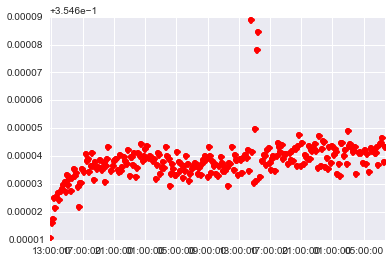

In [24]:
plot_Nist = df_external_norm_mean[df_external_norm_mean["sample"] == "NIST 100ppb"]
plot_Nist = df_external_norm_mean[(df_external_norm_mean["118"] >=1)]
#dataplot = plot(plot_Nist["Te/Sn"], plot_Nist["124/120"], "ro")
dataplot = plot(plot_Nist.index, plot_Nist["119/118"], "ro")
show(dataplot)

In [181]:
df_external_norm_mean = df_external_norm_mean[(df_external_norm_mean["118"] >=1)]
sub_index = df_external_norm_mean[(df_external_norm_mean["sample"].shift(1) == df_external_norm_mean["sample"].shift(-1)) & (df_external_norm_mean["sample"].shift(1) == "NIST 100ppb")].index
sample = df_external_norm_mean["sample"]
new = df_external_norm_mean[df_external_norm_mean.columns[df_external_norm_mean.dtypes != 'object']]

new =  ((new / ((new.shift(1) + new.shift(-1))/2))-1)*10000
new["sample"] = sample

new = new[new.index.isin(sub_index)]
#df_external_norm_signal = df_external_norm_signal[df_external_norm_signal['sample'].isin(sub_index.tolist())]
#df_new_signal = new.merge(df_external_norm_signal, left_index=True, right_index=True)
#new[new.sample != "NIST 100ppb"]
new

,116/120,117/120,118/120,119/120,122/120,124/120,116,117,118,119,120,122,124,125,Te/Sn,sample
date,,,,,,,,,,,,,,,,
2015-11-11 14:33:00,0.221763,0.190033,0.071581,0.135786,-0.252946,-0.024981,80.809297,81.373777,81.895891,82.494889,82.938226,83.839262,85.206308,36902.734899,42312.385756,NIST 100ppb
2015-11-11 14:41:00,-0.231659,-0.204795,0.016337,-0.054398,0.101872,-0.148295,105.394166,104.921583,104.549117,104.086529,103.654674,102.810810,101.616869,795904.628740,1961495.290712,NIST 100ppb
2015-11-11 14:50:00,0.145523,0.085902,0.041380,0.078521,-0.021088,0.013874,-227.548378,-227.646951,-227.679897,-227.730394,-227.843306,-227.960579,-228.012246,-12730.547112,-12827.570183,NIST 100ppb
2015-11-11 14:59:00,0.089765,0.195322,0.041452,-0.025156,0.071865,-0.045389,505.757454,505.892578,505.679676,505.622037,505.812850,505.888227,505.905950,-55864.210922,-51185.209450,NIST 100ppb
2015-11-11 15:14:00,-0.103493,-0.143298,-0.118090,-0.050220,-0.197324,0.069327,-764.230843,-764.254358,-764.076592,-763.967019,-764.148908,-764.185905,-764.126157,-14627.343474,-15590.545265,NIST 100ppb
2015-11-11 15:23:00,-0.055361,-0.076772,-0.006312,-0.012576,0.135721,-0.021592,550.823986,550.807960,550.792022,550.750106,550.882727,550.934699,550.999000,-16607.165607,-16841.614302,NIST 100ppb
2015-11-11 15:31:00,-0.046707,0.011458,-0.017924,0.020640,-0.020080,-0.089663,-39.769314,-39.863802,-39.836200,-39.807483,-39.669099,-39.916995,-39.896794,-33728.976912,-33833.594103,NIST 100ppb
2015-11-11 15:40:00,0.033991,0.133632,0.008317,0.006748,0.178164,0.562860,-230.633214,-230.075931,-230.017197,-229.675224,-229.731117,-228.523278,-228.040827,-16886.912874,-16994.838600,NIST 100ppb
2015-11-11 17:32:00,0.176783,-0.137796,0.078053,-0.020930,-0.171695,-0.783544,295.272644,294.484132,294.180666,293.497891,293.065210,291.510741,290.193311,62152.971207,46331.915601,NIST 100ppb


In [182]:
def SD2(x):
    SD2 = np.std(x) * 2
    return SD2

#new = new.drop(["116", "117", "118", "119", "120", "122", "124"], axis=1)
np.round(new.groupby("sample").agg([np.mean, SD2]), decimals=2)

116/120       117/120       118/120        \
                                       mean   SD2    mean   SD2    mean   SD2   
sample                                                                          
NIST 100ppb                            0.01  0.36    0.01  0.39    0.01  0.22   
NIST 100ppb + 30ppb Sb                -0.91  0.00   -0.53  0.00   -0.54  0.00   
NIST 100ppb + 70ppb Sb                -0.21  0.00   -0.16  0.00   -0.01  0.00   
NIST 100ppb 0.275M HNO3 - 0.005M HF   -0.88  0.00   -0.67  0.00   -0.47  0.00   
NIST 100ppb 0.5M HNO3 - 0.00275M HF   -0.84  0.00   -0.68  0.00   -0.35  0.00   
NIST 100ppb 0.5M HNO3 - 0.01M HF      -0.83  0.00   -0.82  0.00   -0.66  0.00   
NIST 100ppb 1.0M HNO3 - 0.005M HF     -0.90  0.00   -0.77  0.00   -0.41  0.00   
NIST 110ppb + 50ppb Sb                -0.61  0.00   -0.53  0.00   -0.36  0.00   
NIST 120ppb + 50ppb Sb                -0.96  0.00   -0.65  0.00   -0.42  0.00   
NIST 150ppb + 50ppb Sb                -0.82  0.00   -0.78  0.00   -0.37  0.00   
NIST 50ppb + 50ppb Sb                  0.28  0.00    0.26  0.00    0.17  0.00   
NIST 80ppb + 50ppb Sb                 -0.29  0.00   -0.29  0.00   -0.13  0.00   
NIST 90ppb + 50ppb Sb                 -0.95  0.00   -0.79  0.00   -0.48  0.00   
NIST EV HCl 1                         -0.24  0.00   -0.28  0.00   -0.16  0.00   
NIST EV HCl 2                         -0.18  0.00   -0.34  0.00   -0.02  0.00   
NIST EV HCl 4                         -1.40  0.00   -1.03  0.00   -0.78  0.00   
NIST EV HCl 4 2                       -0.77  0.00   -0.22  0.00   -0.44  0.00   
NIST EV HCl 5                         -0.92  0.00   -0.57  0.00   -0.36  0.00   
NIST EV NO3 4                         -0.15  0.00   -0.10  0.00    0.04  0.00   
NIST EV NO3 4 2                        0.04  0.00    0.04  0.00    0.05  0.00   
NIST EV NO3 5                         -0.16  0.00   -0.14  0.00   -0.05  0.00   
NIST EV NO3 5 2                        0.43  0.00    0.14  0.00    0.19  0.00   
NIST EV NO3 6                          0.24  0.00    0.25  0.00    0.23  0.00   
NIST EV NO3 6 2                        0.74  0.00    0.65  0.00    0.42  0.00   
NIST EV NO3-HF1                        0.08  0.00   -0.03  0.00    0.11  0.00   
NIST EV NO3-HF2                       -0.62  0.00   -0.54  0.00   -0.17  0.00   
NIST EV NO3-HF2 2                      0.28  0.00    0.22  0.00    0.18  0.00   
SPEX 100ppb                           -3.58  1.03   -2.68  0.95   -1.76  0.52   

                                    119/120       122/120          ...      \
                                       mean   SD2    mean   SD2    ...       
sample                                                             ...       
NIST 100ppb                            0.01  0.24    0.01  0.32    ...       
NIST 100ppb + 30ppb Sb                -0.22  0.00    0.52  0.00    ...       
NIST 100ppb + 70ppb Sb                -0.04  0.00    0.28  0.00    ...       
NIST 100ppb 0.275M HNO3 - 0.005M HF   -0.26  0.00    0.49  0.00    ...       
NIST 100ppb 0.5M HNO3 - 0.00275M HF    0.03  0.00    0.59  0.00    ...       
NIST 100ppb 0.5M HNO3 - 0.01M HF      -0.36  0.00    0.37  0.00    ...       
NIST 100ppb 1.0M HNO3 - 0.005M HF     -0.30  0.00    0.49  0.00    ...       
NIST 110ppb + 50ppb Sb                -0.17  0.00    0.01  0.00    ...       
NIST 120ppb + 50ppb Sb                -0.19  0.00    0.47  0.00    ...       
NIST 150ppb + 50ppb Sb                -0.19  0.00    0.64  0.00    ...       
NIST 50ppb + 50ppb Sb                 -0.04  0.00   -1.27  0.00    ...       
NIST 80ppb + 50ppb Sb                 -0.10  0.00   -0.13  0.00    ...       
NIST 90ppb + 50ppb Sb                 -0.35  0.00    0.14  0.00    ...       
NIST EV HCl 1                         -0.01  0.00    0.36  0.00    ...       
NIST EV HCl 2                          0.02  0.00    0.50  0.00    ...       
NIST EV HCl 4                         -0.18  0.00    0.78  0.00    ...       
NIST EV HCl 4 2                       -0.0

In [202]:
df_all.to_csv(path_sav + "Sn_H8_L3_Sb_NU_Signals_zero_corr.csv", mode='a', header=False)

In [100]:
df_external_sub.to_csv(path_sav + "Sn_H6_L3_SB_external_norm.csv", mode='a', header=False)

In [25]:
df_external_norm_mean_sd.to_csv(path + "Sn_H8_L3_SB_internal_norm_mean_122_118.csv", mode='a', header=True)